In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/SKILLFIT"

/content/drive/MyDrive/SKILLFIT


In [ ]:
import json

In [ ]:
data = json.load(open('/content/drive/MyDrive/SKILLFIT/finall.json','r'))

In [ ]:
len(data)

2

In [ ]:
# data[-1]
print("Keys in data:", data.keys())

Keys in data: dict_keys(['classes', 'annotations'])


In [ ]:
data['annotations'][0]

['This 55 years Asian female presents with a complaint of severe migraine headaches. She has a history of chronic migraines for the past 10 years, typically triggered by stress and lack of sleep. She has tried over-the-counter medications such as Excedrin and Tylenol, which provide partial relief. She denies any recent head injury or trauma. She has no known allergies. Her weight is 140 pounds, and her blood pressure is 130/85. Examination: Physical examination reveals tenderness in the scalp and neck muscles, but no neurological deficits. Assessment: Chronic migraine headaches . Prescribe sumatriptan 50 mg as needed for acute migraine attacks, consider prophylactic medication (propranolol 40 mg daily) if migraines persist, and follow-up in 4 weeks.\r',
 {'entities': [[5, 13, 'AGE'],
   [20, 26, 'GENDER'],
   [63, 82, 'SYMPTOMS'],
   [104, 143, 'HISTORY'],
   [168, 193, 'HISTORY'],
   [245, 253, 'MEDICINE'],
   [258, 265, 'MEDICINE'],
   [384, 394, 'WEIGHT'],
   [422, 429, 'WEIGHT'],
 

In [ ]:
import spacy
from spacy.tokens import DocBin
from tqdm import tqdm

nlp = spacy.blank("en") # load a new spacy model
db = DocBin()

In [ ]:
import spacy
from spacy.tokens import DocBin
from tqdm import tqdm

def get_spacy_doc(file, data):
    # Create a blank spaCy pipeline
    nlp = spacy.blank('en')
    db = DocBin()

    # Iterate through the data
    for item in tqdm(data):
        if isinstance(item, list) and len(item) == 2:
            item = tuple(item)  # Convert list to tuple if necessary

        if not isinstance(item, tuple) or len(item) != 2:
            print(f"Skipping invalid item: {item}")
            continue

        text, annot = item
        if not isinstance(annot, dict) or 'entities' not in annot:
            print(f"Invalid annotation format for item: {item}")
            continue

        doc = nlp.make_doc(text)
        ents = []
        entity_indices = []

        # Extract entities from the annotations
        for start, end, label in annot['entities']:
            if any(idx in entity_indices for idx in range(start, end)):
                continue

            entity_indices.extend(range(start, end))
            span = doc.char_span(start, end, label=label, alignment_mode='strict')

            if span is None:
                # Log errors for annotations that couldn't be processed
                err_data = f"[{start}, {end}]    {text}\n"
                file.write(err_data)
            else:
                ents.append(span)

        try:
            doc.ents = ents
            db.add(doc)
        except Exception as e:
            print(f"Error adding doc to DocBin: {e}")
            continue

    return db

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is dictionary
annotations_data = data['annotations']

# Split the data
train, test = train_test_split(annotations_data, test_size=0.2)

print("Number of items in training set:", len(train))
print("Number of items in testing set:", len(test))


Number of items in training set: 563
Number of items in testing set: 141


In [ ]:
# Assuming 'train' is your training dataset
open('/content/drive/MyDrive/SKILLFIT/trained_models/train_model.txt', 'w')




<_io.TextIOWrapper name='/content/drive/MyDrive/SKILLFIT/trained_models/train_model.txt' mode='w' encoding='UTF-8'>

In [ ]:
# Open the file for writing
file = open('/content/drive/MyDrive/SKILLFIT/trained_models/train_model.txt', 'w')

# Get the spaCy DocBin object
db = get_spacy_doc(file, train)

# Close the file
file.close()

# Save the DocBin object to disk
db.to_disk('/content/drive/MyDrive/SKILLFIT/trained_models/train_data.spacy')

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
  0%|          | 0/563 [00:00<?, ?it/s]

Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None


 76%|███████▌  | 427/563 [00:00<00:00, 2193.95it/s]

Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid item: None
Skipping invalid ite

100%|██████████| 563/563 [00:00<00:00, 2283.49it/s]


Skipping invalid item: None


In [ ]:
file = open('/content/drive/MyDrive/SKILLFIT/trained_models/test_file.txt', 'w')
db.to_disk('/content/drive/MyDrive/SKILLFIT/trained_models/test_data.spacy')


In [ ]:
!python -m spacy init fill-config /content/drive/MyDrive/SKILLFIT/config/config.cfg


[paths]
train = null
dev = null
vectors = null
init_tok2vec = null

[system]
gpu_allocator = null
seed = 0

[nlp]
lang = "en"
pipeline = ["tok2vec","ner"]
batch_size = 1000
disabled = []
before_creation = null
after_creation = null
after_pipeline_creation = null
tokenizer = {"@tokenizers":"spacy.Tokenizer.v1"}
vectors = {"@vectors":"spacy.Vectors.v1"}

[components]

[components.ner]
factory = "ner"
incorrect_spans_key = null
moves = null
scorer = {"@scorers":"spacy.ner_scorer.v1"}
update_with_oracle_cut_size = 100

[components.ner.model]
@architectures = "spacy.TransitionBasedParser.v2"
state_type = "ner"
extra_state_tokens = false
hidden_width = 64
maxout_pieces = 2
use_upper = true
nO = null

[components.ner.model.tok2vec]
@architectures = "spacy.Tok2VecListener.v1"
width = ${components.tok2vec.model.encode.width}
upstream = "*"

[components.tok2vec]
factory = "tok2vec"

[components.tok2vec.model]
@architectures = "spacy.Tok2Vec.v2"

[components.tok2vec.model.embed]
@architectures = 

In [ ]:
!python -m spacy train /content/drive/MyDrive/SKILLFIT/config/config.cfg  --output /content/drive/MyDrive/SKILLFIT/trained_models/output  --paths.train /content/drive/MyDrive/SKILLFIT/trained_models/train_data.spacy  --paths.dev /content/drive/MyDrive/SKILLFIT/trained_models/test_data.spacy


ℹ Saving to output directory:
/content/drive/MyDrive/SKILLFIT/trained_models/output
ℹ Using CPU
ℹ To switch to GPU 0, use the option: --gpu-id 0

=========================== Initializing pipeline ===========================
2024-06-16 17:44:39.007450: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-16 17:44:39.007502: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-16 17:44:39.008907: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-16 17:44:39.016502: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU ins

In [ ]:
nlp = spacy.load('/content/drive/MyDrive/SKILLFIT/trained_models/output/model-best')

In [ ]:
doc=nlp("Mr. ABC is a 60-year-old gentleman who had a markedly abnormal stress test earlier today in my office with severe chest pain after 5 minutes of exercise on the standard Bruce with horizontal ST depressions and moderate apical ischemia on stress imaging only. He required 3 sublingual nitroglycerin in total (please see also admission history and physical for full details). The patient underwent cardiac catheterization with myself today which showed mild-to-moderate left main distal disease of 30%, moderate proximal LAD with a severe mid-LAD lesion of 99%, and a mid-left circumflex lesion of 80% with normal LV function and some mild luminal irregularities in the right coronary artery with some moderate stenosis seen in the mid to distal right PDA. Medications: Aspirin 325 mg once a day., Metoprolol 50 mg once a day,  Nexium 40 mg once a day,Zocor 40 mg once a day,  Plavix 600 mg.\r")

In [ ]:
entities=[]
for entity in doc.ents:
  entities.append({"Entity": entity.label_,"Text": entity.text})
print(entities)

[{'Entity': 'HISTORY', 'Text': '60-year-old gentleman who had a markedly abnormal'}, {'Entity': 'SYMPTOMS', 'Text': 'chest pain'}, {'Entity': 'MEDICINE', 'Text': 'Aspirin'}, {'Entity': 'DOSAGE', 'Text': '325 mg'}, {'Entity': 'MEDICINE', 'Text': 'Metoprolol'}, {'Entity': 'DOSAGE', 'Text': '50 mg once a'}, {'Entity': 'MEDICINE', 'Text': 'Nexium'}, {'Entity': 'DOSAGE', 'Text': '40 mg once a'}, {'Entity': 'MEDICINE', 'Text': 'Zocor'}, {'Entity': 'DOSAGE', 'Text': '40 mg once a day,  '}, {'Entity': 'DOSAGE', 'Text': '600 mg.'}]


In [ ]:
import pandas as pd

data = {}

for entity in entities:
    entity_type = entity['Entity']
    entity_value = entity['Text']

    if entity_type not in data:
        data[entity_type] = []

    data[entity_type].append(entity_value)

max_length = max(len(values) for values in data.values())

# Normalizing lengths of the lists in the data dictionary
for key in data:
    if len(data[key]) < max_length:
        data[key].extend([None] * (max_length - len(data[key])))


df = pd.DataFrame(data)


print(df)



                                             HISTORY    SYMPTOMS    MEDICINE  \
0  60-year-old gentleman who had a markedly abnormal  chest pain     Aspirin   
1                                               None        None  Metoprolol   
2                                               None        None      Nexium   
3                                               None        None       Zocor   
4                                               None        None        None   

                DOSAGE  
0               325 mg  
1         50 mg once a  
2         40 mg once a  
3  40 mg once a day,    
4              600 mg.  


In [ ]:
colors={"AGE=":"#F67DE3","GENDER":"#e6194B","MEDICINE":"#3cb44b"}
options={"colors":colors}
spacy.displacy.render(doc, style="ent",options=options, jupyter=True)

Precision: 0.8742857142857143
Recall: 0.8693181818181818
F1-score: 0.8717948717948718


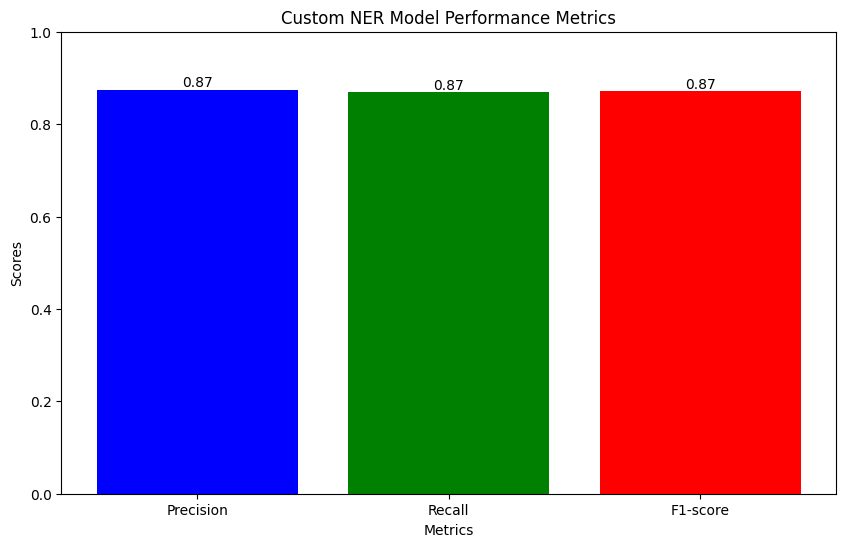

In [ ]:
import spacy
from spacy.training import Example
from spacy.scorer import Scorer
import matplotlib.pyplot as plt

nlp = spacy.load('/content/drive/MyDrive/SKILLFIT/trained_models/output/model-best')
scorer = Scorer()

examples = []

for item in test:
    if item is None:
        continue

    # Ensure item is a list with the correct structure
    if isinstance(item, list) and len(item) == 2 and isinstance(item[0], str) and isinstance(item[1], dict):
        text = item[0]
        entities_dict = item[1]

        if 'entities' in entities_dict:
            entities = entities_dict['entities']

            # Convert entities to the required format
            annots = [(start, end, label) for start, end, label in entities]

            predicted = nlp(text)

            final = {'entities': annots}

            example = Example.from_dict(predicted, final)
            examples.append(example)
        else:
            print(f"Skipping item with missing 'entities' key: {item}")
    else:
        print(f"Skipping invalid item: {item}")

# Score the examples
scores = scorer.score(examples)

# Extract overall metrics
precision = scores["ents_p"]
recall = scores["ents_r"]
f1_score = scores["ents_f"]


print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

# Check if any metric is None
if None in [precision, recall, f1_score]:
    print("Warning: One or more metrics is None. Check the evaluation process.")

if None not in [precision, recall, f1_score]:
    metrics = [precision, recall, f1_score]
    metrics_names = ["Precision", "Recall", "F1-score"]

    plt.figure(figsize=(10, 6))
    plt.bar(metrics_names, metrics, color=['blue', 'green', 'red'])
    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.title('Custom NER Model Performance Metrics')
    plt.ylim(0, 1)
    for index, value in enumerate(metrics):
        plt.text(index, value, f"{value:.2f}", ha='center', va='bottom')
    plt.show()
else:
    print("Cannot plot metrics because one or more metrics is None.")


In [ ]:
pip install https://huggingface.co/kormilitzin/en_core_med7_trf/resolve/main/en_core_med7_trf-any-py3-none-any.whl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 GB 745.5 kB/s eta 0:00:00
  Using cached spacy-3.4.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.5 MB)
  Using cached thinc-8.1.12-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (919 kB)
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.4
    Uninstalling thinc-8.2.4:
      Successfully uninstalled thinc-8.2.4
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:
      Successfully uninstalled spacy-3.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.7.1 requires spacy<3.8.0,>=3.7.2, but you have spacy 3.4.4 which is incompatible.


In [ ]:
pip install spacy-transformers


In [ ]:
!python -m spacy download en_core_web_trf


2024-06-16 18:09:13.339781: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-16 18:09:13.339841: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-16 18:09:13.341896: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-16 18:09:13.352721: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-16 18:09:14.833143: W tensorflow/comp

In [ ]:
med7 = spacy.load("en_core_med7_trf")

medical_text = "PREOPERATIVE DIAGNOSIS:,  Rhabdomyosarcoma of the left orbit.,POSTOPERATIVE DIAGNOSIS:,  Rhabdomyosarcoma of the left orbit.,PROCEDURE: , Left subclavian vein MediPort placement (7.5-French single-lumen).,INDICATIONS FOR PROCEDURE: , This patient is a 16-year-old girl, with newly diagnosed rhabdomyosarcoma of the left orbit.  The patient is being taken to the operating room for MediPort placement.  She needs chemotherapy.,DESCRIPTION OF PROCEDURE: , The patient was taken to the operating room, placed supine, put under general endotracheal anesthesia.  The patient's neck, chest, and shoulders were prepped and draped in usual sterile fashion.  An incision was made on the left shoulder area.  The left subclavian vein was cannulated.  The wire was passed, which was in good position under fluoro, using Seldinger Technique.  Near wire incision site made a pocket above the fascia and sutured in a size 7.5-French single-lumen MediPort into the pocket in 4 places using 3-0 Nurolon.  I then sized the catheter under fluoro and placed introducer and dilator over the wire, removed the wire and dilator, placed the catheter through the introducer and removed the introducer.  The line tip was in good position under fluoro.  It withdrew and flushed well.  I then closed the incision using 4-0 Vicryl, 5-0 Monocryl for the skin, and dressed with Steri-Strips.  Accessed the ports with a 1-inch 20-gauge Huber needle, and it withdrew and flushed well with final heparin flush.  We secured this with Tegaderm.  The patient is then to undergo bilateral bone marrow biopsy and lumbar puncture by Oncology."


docs = med7(medical_text)


extracted_entities = [(ent.text, ent.label_) for ent in docs.ents]
print(extracted_entities)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_med7_trf' (3.4.2.1) was trained with spaCy v3.4.2 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


ValueError: [E002] Can't find factory for 'transformer' for language English (en). This usually happens when spaCy calls `nlp.create_pipe` with a custom component name that's not registered on the current language class. If you're using a custom component, make sure you've added the decorator `@Language.component` (for function components) or `@Language.factory` (for class components).

Available factories: attribute_ruler, tok2vec, merge_noun_chunks, merge_entities, merge_subtokens, token_splitter, doc_cleaner, parser, beam_parser, lemmatizer, trainable_lemmatizer, entity_linker, entity_ruler, tagger, morphologizer, ner, beam_ner, senter, sentencizer, spancat, spancat_singlelabel, span_finder, future_entity_ruler, span_ruler, textcat, textcat_multilabel, en.lemmatizer

In [ ]:
import json
with open("/content/drive/MyDrive/SKILLFIT/finall.json", "r") as f:
    annotated_data = json.load(f)


def merge_entities(existing_entities, new_entities):
    merged_entities = existing_entities.copy()
    for ent in new_entities:

        if ent not in merged_entities:
            merged_entities.append(ent)
    return merged_entities

# Process text with Med7 and merge entities with annotated data
for entry in annotated_data:
    if isinstance(entry, dict):

        clinical_text = entry.get("PREOPERATIVE DIAGNOSIS:,  Left renal mass, 5 cm in diameter.,POSTOPERATIVE DIAGNOSIS:,  Left renal mass, 5 cm in diameter.,OPERATION PERFORMED: , Left partial nephrectomy.,ANESTHESIA: , General with epidural.,COMPLICATIONS: , None.,ESTIMATED BLOOD LOSS: , About 350 mL.,REPLACEMENT: , Crystalloid and Cell Savers from the case.,INDICATIONS FOR SURGERY:  ,This is a 64-year-old man with a left renal mass that was confirmed to be renal cell carcinoma by needle biopsy.  Due to the peripheral nature of the tumor located in the mid to lower pole laterally, he has elected to undergo a partial nephrectomy.  Potential complications include but are not limited to,,1.  Infection.,2.  Bleeding.,3.  Postoperative pain.,4.  Herniation from the incision.,PROCEDURE IN DETAIL:,  Epidural anesthesia was administered in the holding area, after which the patient was transferred into the operating room.  General endotracheal anesthesia was administered, after which the patient was positioned in the flank standard position.  A left flank incision was made over the area of the twelfth rib.  The subcutaneous space was opened by using the Bovie.  The ribs were palpated clearly and the fascia overlying the intercostal space between the eleventh and twelfth rib was opened by using the Bovie.  The fascial layer covering of the intercostal space was opened completely until the retroperitoneum was entered.  Once the retroperitoneum had been entered, the incision was extended until the peritoneal envelope could be identified.  The peritoneum was swept medially.  The Finochietto retractor was then placed for exposure.  The kidney was readily identified and was mobilized from outside Gerota's fascia.  The ureter was dissected out easily and was separated with a vessel loop.  The superior aspect of the kidney was mobilized from the superior attachment.  The pedicle of the left kidney was completely dissected revealing the vein and the artery.  The artery was a single artery and was dissected easily by using a right-angle clamp.  A vessel loop was placed around the renal artery.  The tumor could be easily palpated in the lateral lower pole to mid pole of the left kidney.  The Gerota's fascia overlying that portion of the kidney was opened in the area circumferential to the tumor.  Once the renal capsule had been identified, the capsule was scored using a Bovie about 0.5 cm lateral to the border of the tumor.  Bulldog clamp was then placed on the renal artery.  The tumor was then bluntly dissected off of the kidney with a thin rim of a normal renal cortex.  This was performed by using the blunted end of the scalpel.  The tumor was removed easily.  The argon beam coagulation device was then utilized to coagulate the base of the resection.  The visible larger bleeding vessels were oversewn by using 4-0 Vicryl suture.  The edges of the kidney were then reapproximated by using 2-0 Vicryl suture with pledgets at the ends of the sutures to prevent the sutures from pulling through.  Two horizontal mattress sutures were placed and were tied down.  The Gerota's fascia was then also closed by using 2-0 Vicryl suture.  The area of the kidney at the base was covered with Surgicel prior to tying the sutures.  The bulldog clamp was removed and perfect hemostasis was evident.  There was no evidence of violation into the calyceal system.  A 19-French Blake drain was placed in the inferior aspect of the kidney exiting the left flank inferior to the incision.  The drain was anchored by using silk sutures.  The flank fascial layers were closed in three separate layers in the more medial aspect.  The lateral posterior aspect was closed in two separate layers using Vicryl sutures.  The skin was finally reapproximated by using metallic clips.  The patient tolerated the procedure well", "")

        clinical_doc = med7(clinical_text)

        # Extract entities from Med7
        med7_entities = [(ent.text, ent.label_) for ent in clinical_doc.ents]

        merged_entities = merge_entities(entry.get("entities", []), med7_entities)

        entry["entities"] = merged_entities


In [ ]:
import os

def read_raw_text_file(file_path):
    with open(file_path, 'r') as file:
        raw_text = file.read()
    return raw_text

raw_text_file = '/content/drive/MyDrive/SKILLFIT/train_model.txt'
raw_text_data = read_raw_text_file(raw_text_file)

# Combine raw text data with annotations
combined_data = []
for raw_text, annotation in zip(raw_text_data, annotated_data):
    if isinstance(annotation, dict) and 'annotations' in annotation:
        combined_data.append({'text': raw_text, 'annotations': annotation['annotations']})
    else:
        print(f"Unexpected annotation format: {annotation}")

print(combined_data)

training_data = []
for item in combined_data:
    text = item['text']
    annotations = item['annotations']
    entities = [(start, end, label) for start, end, label in annotations]
    training_data.append((text, {'entities': entities}))



In [ ]:
import json
import pandas as pd
import spacy
from spacy.training.example import Example


nlp_custom = spacy.load('/content/drive/MyDrive/SKILLFIT/trained_models/output/model-best')


med7_model = spacy.load("en_core_med7_trf")

def read_data_from_text_file(file_path):
    with open(file_path, 'r') as file:
        return file.readlines()


new_text_file_path = "/content/drive/MyDrive/SKILLFIT/train_model.txt"
json_annotations_file_path = "/content/drive/MyDrive/SKILLFIT/finall.json"
csv_file_path = "dynamic_structured_data.csv"

new_clinical_data = read_data_from_text_file(new_text_file_path)

with open(json_annotations_file_path, 'r') as file:
    annotations = json.load(file)

# Extract classes and annotations
entity_types = annotations['classes']
annotation_data = annotations['annotations']

# Prepare training data for custom NER model
training_data = []
for item in annotation_data:
    if item is not None and isinstance(item, list) and len(item) > 1:
        text = item[0]
        ents = item[1]['entities']
        entities = [(ent[0], ent[1], ent[2]) for ent in ents]
        example = Example.from_dict(nlp_custom.make_doc(text), {"entities": entities})
        training_data.append(example)

# Initialize a list to store structured data
combined_entities_list = []


for clinical_text in new_clinical_data:
    # Process Med7 model
    doc_med7 = med7_model(clinical_text)
    med7_entities = [(ent.text, ent.label_) for ent in doc_med7.ents]

    # Process custom NER model
    doc_custom = nlp_custom(clinical_text)
    custom_entities = [(ent.text, ent.label_) for ent in doc_custom.ents]

    combined_entities = med7_entities + custom_entities

    text_data = {entity_type: [] for entity_type in entity_types}
    text_data['Text'] = clinical_text.strip()

    # Organize entities by label
    for entity, label in combined_entities:
        if label in text_data:
            text_data[label].append(entity)

    # Convert lists to comma-separated strings
    for key in text_data:
        if isinstance(text_data[key], list):
            text_data[key] = ", ".join(text_data[key])

    combined_entities_list.append(text_data)

df = pd.DataFrame(combined_entities_list)


df.to_csv(csv_file_path, index=False)

print(f"Annotated data saved to {csv_file_path}")


In [ ]:
import spacy
from spacy.training import Example
from spacy.scorer import Scorer
import matplotlib.pyplot as plt


nlp = spacy.load('/content/drive/MyDrive/SKILLFIT/trained_models/output/model-best')
scorer = Scorer()

examples = []

for item in test:

    if item is None:
        continue


    if isinstance(item, list) and len(item) == 2 and isinstance(item[0], str) and isinstance(item[1], dict):
        text = item[0]
        entities_dict = item[1]

        if 'entities' in entities_dict:
            entities = entities_dict['entities']


            annots = [(start, end, label) for start, end, label in entities]


            predicted = nlp(text)


            final = {'entities': annots}


            example = Example.from_dict(predicted, final)
            examples.append(example)
        else:
            print(f"Skipping item with missing 'entities' key: {item}")
    else:
        print(f"Skipping invalid item: {item}")

scores = scorer.score(examples)


precision = scores["ents_p"]
recall = scores["ents_r"]
f1_score = scores["ents_f"]


print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)


if None in [precision, recall, f1_score]:
    print("Warning: One or more metrics is None. Check the evaluation process.")

if None not in [precision, recall, f1_score]:
    metrics = [precision, recall, f1_score]
    metrics_names = ["Precision", "Recall", "F1-score"]

    plt.figure(figsize=(10, 6))
    plt.bar(metrics_names, metrics, color=['blue', 'green', 'red'])
    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.title('Custom NER Model Performance Metrics')
    plt.ylim(0, 1)
    for index, value in enumerate(metrics):
        plt.text(index, value, f"{value:.2f}", ha='center', va='bottom')
    plt.show()
else:
    print("Cannot plot metrics because one or more metrics is None.")


In [ ]:
import pandas as pd
import spacy
from spacy.training import Example
from spacy.scorer import Scorer


nlp_custom = spacy.load('/content/drive/MyDrive/SKILLFIT/trained_models/output/model-best')


df = pd.read_csv('/content/drive/MyDrive/SKILLFIT/dynamic_structured_data.csv')

scorer = Scorer()

scores = []


for index, row in df.iterrows():
    text = row['Text']
    entities = row['Entities']


    example = Example.from_dict(nlp_custom.make_doc(text), {'entities': entities})


    scores.append(scorer.score([example]))


precision = sum(score['ents_p'] for score in scores) / len(scores)
recall = sum(score['ents_r'] for score in scores) / len(scores)
f1_score = sum(score['ents_f'] for score in scores) / len(scores)


print("Custom NER Model:")
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)


In [ ]:
import pandas as pd
import spacy
from spacy.training import Example
from spacy.scorer import Scorer
import json


nlp_custom = spacy.load('/content/drive/MyDrive/SKILLFIT/trained_models/output/model-best')
nlp_med7 = spacy.load("en_core_med7_trf")


df = pd.read_csv('/content/drive/MyDrive/SKILLFIT/dynamic_structured_data.csv')

print(df.columns)

# Ensure the 'Text' column is present
if 'Text' not in df.columns:
    raise ValueError("The CSV file must contain a 'Text' column.")

with open('/content/drive/MyDrive/SKILLFIT/finall.json', 'r') as file:
    annotations_data = json.load(file)

# Convert annotations into a dictionary for easy lookup
annotations_dict = {item['text']: item['annotations'] for item in annotations_data}


scorer_custom = Scorer()
scorer_med7 = Scorer()

scores_custom = []
scores_med7 = []

# Iterate through each row of the DataFrame
for index, row in df.iterrows():
    text = row['Text']

    if text in annotations_dict:
        entities = annotations_dict[text]
    else:
        print(f"No annotations found for text: {text}")
        continue

    # Create Example objects
    example_custom = Example.from_dict(nlp_custom.make_doc(text), {'entities': entities})
    example_med7 = Example.from_dict(nlp_med7.make_doc(text), {'entities': entities})

    # Score the examples
    scores_custom.append(scorer_custom.score([example_custom]))
    scores_med7.append(scorer_med7.score([example_med7]))

# Aggregate scores for both models
precision_custom = sum(score['ents_p'] for score in scores_custom) / len(scores_custom)
recall_custom = sum(score['ents_r'] for score in scores_custom) / len(scores_custom)
f1_score_custom = sum(score['ents_f'] for score in scores_custom) / len(scores_custom)

precision_med7 = sum(score['ents_p'] for score in scores_med7) / len(scores_med7)
recall_med7 = sum(score['ents_r'] for score in scores_med7) / len(scores_med7)
f1_score_med7 = sum(score['ents_f'] for score in scores_med7) / len(scores_med7)

# Print the evaluation metrics
print("Custom NER Model:")
print("Precision:", precision_custom)
print("Recall:", recall_custom)
print("F1-score:", f1_score_custom)

print("\nMed7 Model:")
print("Precision:", precision_med7)
print("Recall:", recall_med7)
print("F1-score:", f1_score_med7)
